In [1]:
from IPython.display import Image

In [2]:
Image(url='https://safetyandsecurityafrica.com/wp-content/uploads/2022/02/ionization-smoke-detectors.jpg',width=600,height=400)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier 
from sklearn.metrics import accuracy_score
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
import time

In [4]:
data=pd.read_csv('smoke_detection_iot.csv')

In [5]:
data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [7]:
data.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [8]:
data.nunique()

Unnamed: 0        62630
UTC               62630
Temperature[C]    21672
Humidity[%]        3890
TVOC[ppb]          1966
eCO2[ppm]          1713
Raw H2             1830
Raw Ethanol        2659
Pressure[hPa]      2213
PM1.0              1337
PM2.5              1351
NC0.5              3093
NC1.0              4113
NC2.5              1161
CNT               24994
Fire Alarm            2
dtype: int64

In [9]:
data['Humidity']=data['Humidity[%]']
data['Temperature']=data['Temperature[C]']
data['TVOC']=data['TVOC[ppb]']
data['ECO2']=data['eCO2[ppm]']
data['Pressure']=data['Pressure[hPa]']

In [10]:
data.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
Humidity          0
Temperature       0
TVOC              0
ECO2              0
Pressure          0
dtype: int64

In [11]:
data.drop(['Temperature[C]','Humidity[%]','TVOC[ppb]','eCO2[ppm]','Pressure[hPa]'],axis=1,inplace=True)

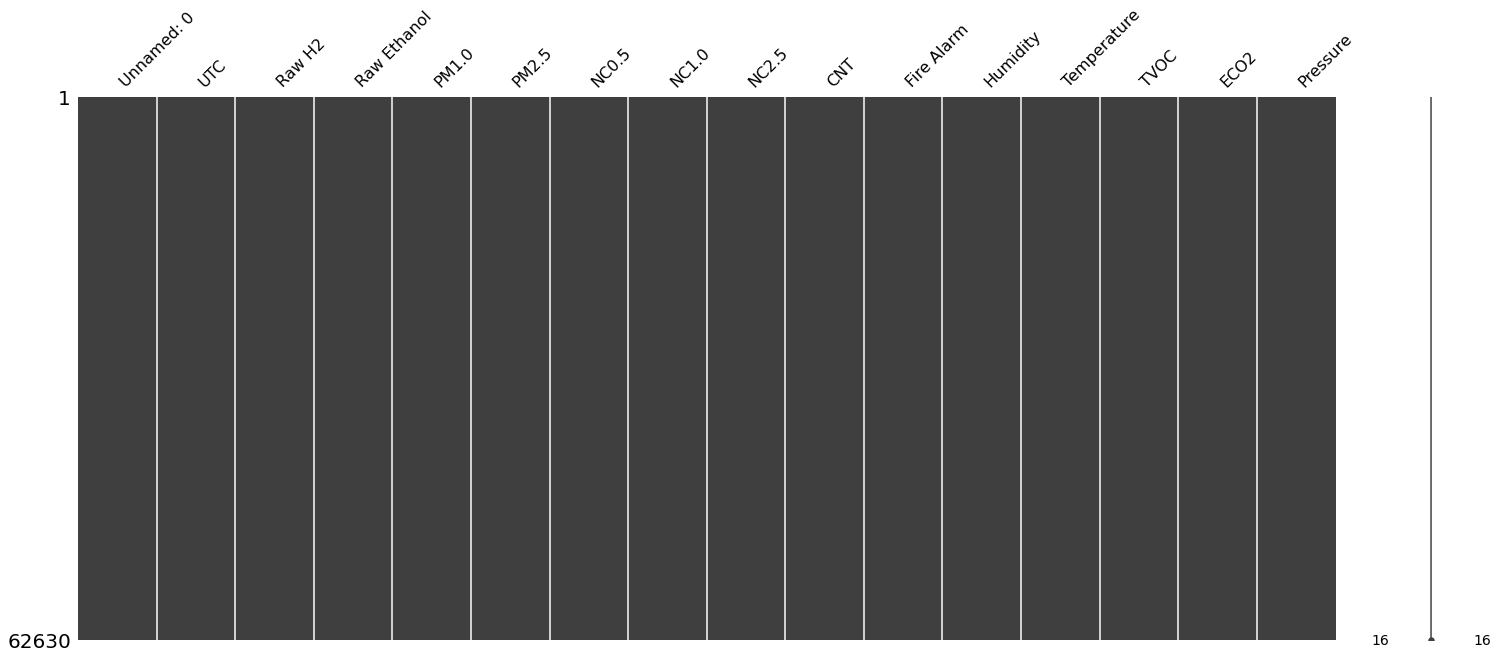

In [12]:
msn.matrix(data)
plt.show()

In [13]:
data.drop(['Unnamed: 0','CNT','UTC'],axis=1,inplace=True)

In [14]:
data.head()

,Raw H2,Raw Ethanol,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm,Humidity,Temperature,TVOC,ECO2,Pressure
0,12306,18520,0.0,0.0,0.0,0.0,0.0,0,57.36,20.000,0,400,939.735
1,12345,18651,0.0,0.0,0.0,0.0,0.0,0,56.67,20.015,0,400,939.744
2,12374,18764,0.0,0.0,0.0,0.0,0.0,0,55.96,20.029,0,400,939.738
3,12390,18849,0.0,0.0,0.0,0.0,0.0,0,55.28,20.044,0,400,939.736
4,12403,18921,0.0,0.0,0.0,0.0,0.0,0,54.69,20.059,0,400,939.744


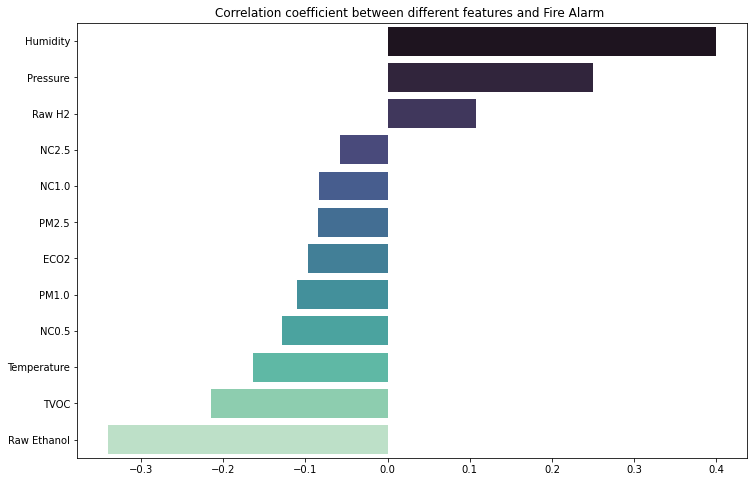

In [15]:
plt.figure(figsize=(12,8))
data_4 = data.corr()["Fire Alarm"].sort_values(ascending=False)
indices = data_4.index
labels = []
corr = []
for i in range(1, len(indices)):
    labels.append(indices[i])
    corr.append(data_4[i])
sns.barplot(x=corr, y=labels, palette='mako')
plt.title('Correlation coefficient between different features and Fire Alarm ')
plt.show()

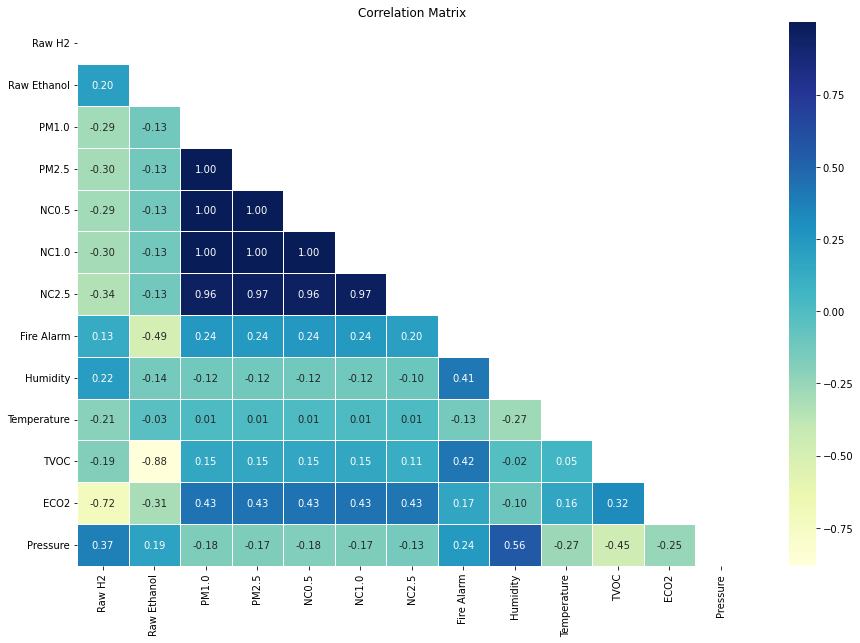

In [16]:
plt.figure(figsize = (15,10))
corr = data.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

In [17]:
yes_fire = data[(data['Fire Alarm'] != 0)]
no_fire = data[(data['Fire Alarm'] == 0)]

trace = go.Bar(x = (len(no_fire), len(yes_fire)), y = ['No_fire', 'Yes_fire'], orientation = 'h', opacity = 0.8, marker=dict(
        color=['orange', 'darkblue'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of Fire Alarm variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [18]:
trace = go.Pie(labels = ['Yes_Fire', 'No_Fire'], values = data['Fire Alarm'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['ldarkblue','orange'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of Fire Alarm variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

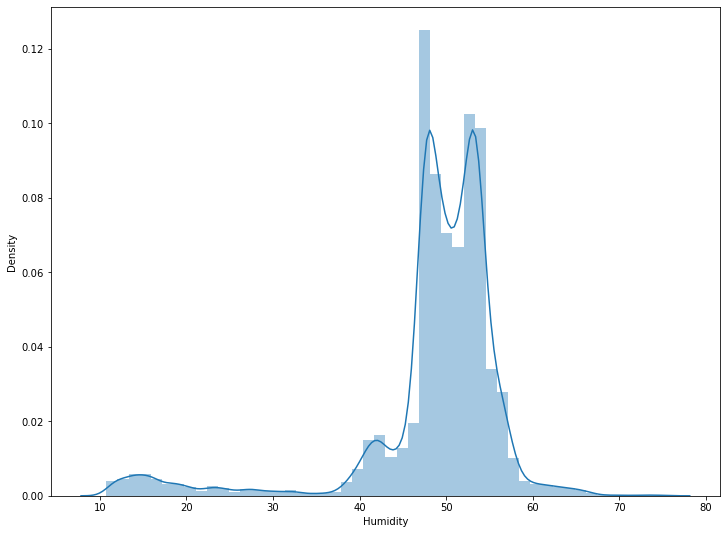

In [19]:
plt.figure(figsize=(12,9))
sns.distplot(data['Humidity'])
plt.show()

In [20]:
data.head()

,Raw H2,Raw Ethanol,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm,Humidity,Temperature,TVOC,ECO2,Pressure
0,12306,18520,0.0,0.0,0.0,0.0,0.0,0,57.36,20.000,0,400,939.735
1,12345,18651,0.0,0.0,0.0,0.0,0.0,0,56.67,20.015,0,400,939.744
2,12374,18764,0.0,0.0,0.0,0.0,0.0,0,55.96,20.029,0,400,939.738
3,12390,18849,0.0,0.0,0.0,0.0,0.0,0,55.28,20.044,0,400,939.736
4,12403,18921,0.0,0.0,0.0,0.0,0.0,0,54.69,20.059,0,400,939.744


In [21]:
X = data.copy()
X.drop('Fire Alarm',axis = 1,inplace = True)
y = data['Fire Alarm']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [23]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [24]:
models = [AdaBoostClassifier(),SVC()]

In [25]:
Name = []
Accuracy = []
Time_Taken = []
for model in models:
    Name.append(type(model).__name__)
    begin = time.time()
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    end = time.time()
    accuracyScore = accuracy_score(prediction,y_test)
    Accuracy.append(accuracyScore)
    Time_Taken.append(end-begin)

In [26]:
Dict = {'Name':Name,'Accuracy':Accuracy,'Time Taken':Time_Taken}
model_df = pd.DataFrame(Dict)
model_df

,Name,Accuracy,Time Taken
0,AdaBoostClassifier,0.999521,2.495454
1,SVC,0.968306,28.082483
